# Learning Python From Scratch!
With Chweya Matagaro

Part 5

Lets start by importing important packages:

# Inferential Statistics 

In [2]:
import pandas as pd               # library used for data manipulation and analysis
import numpy as np                # library used for working with arrays
import matplotlib.pyplot as plt   # library for plots and visualizations
import seaborn as sns             # library for visualizations
import scipy.stats as stats       # library contains a large number of probability distributions as well as a growing library of statistical functions
sns.set()                         # 

## Binomial Distribution
Lets model a binomial process with:
* `n`: number of trials
* `p`: prob. of success in each trial
* `q`: prob. of failure in each trial
* `x`: Total number of successes out of the n trials.
>$q=1-p$

`x` is a modelled by a binomial process and has the probability mass 
>$P(X=x)={n\choose x}p^x.q^{n-x}$


>$P(X=x)={n\choose x}p^x.(1-p)^{n-x}$

>$F_X(x) = P(X\leq x)$

### Individual instances of x:

In [3]:
stats.binom.pmf(n=10,p=0.6,k=6)

0.2508226559999998

In [4]:
stats.binom.cdf(n=10,p=0.6,k=6)

0.6177193984000001

In [5]:
stats.binom.ppf(n=10,p=0.6,q=0.6177193984000001)           #`ppf` is the inverse of the `cdf` function

6.0

In [6]:
stats.binom.interval(alpha=0.95,n=10,p=0.8)

(5.0, 10.0)

### Multiple instances of x

In [7]:
stats.binom.pmf(n=10, p=0.6, k=[3,4,9])

array([0.04246733, 0.11147674, 0.04031078])

In [8]:
stats.binom.cdf(n=10,p=0.8,k=[3,4,9])

array([8.64358400e-04, 6.36938240e-03, 8.92625818e-01])

In [9]:
stats.binom.ppf(n=10,p=0.8,q=stats.binom.cdf(n=10,p=0.8,k=[3,4,9]))  #`ppf` is the inverse of the `cdf` function

array([3., 4., 9.])

In [10]:
stats.binom.ppf(n=10,p=0.8,q=[0.025, 0.975])

array([ 5., 10.])

In [11]:
stats.binom.interval(alpha=0.95,n=10,p=0.8)

(5.0, 10.0)

### All instances of x:

In [12]:
np.arange(11)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [13]:
stats.binom.pmf(n=10, p=0.8, k=np.arange(11))

array([1.02400000e-07, 4.09600000e-06, 7.37280000e-05, 7.86432000e-04,
       5.50502400e-03, 2.64241152e-02, 8.80803840e-02, 2.01326592e-01,
       3.01989888e-01, 2.68435456e-01, 1.07374182e-01])

In [14]:
stats.binom.cdf(n=10, p=0.8, k=np.arange(11))

array([1.02400000e-07, 4.19840000e-06, 7.79264000e-05, 8.64358400e-04,
       6.36938240e-03, 3.27934976e-02, 1.20873882e-01, 3.22200474e-01,
       6.24190362e-01, 8.92625818e-01, 1.00000000e+00])

In [15]:
n=20
p=0.8
k_cdf=np.linspace(0,1,21)

binom_percentiles=pd.DataFrame(data=stats.binom.ppf(n=n, p=p, q=k_cdf),index=k_cdf,columns=['x'])
binom_percentiles.index.name='Percentile'
binom_percentiles

,x
Percentile,
0.00,-1.0
0.05,13.0
0.10,14.0
0.15,14.0
0.20,15.0
0.25,15.0
0.30,15.0
0.35,15.0
0.40,16.0


### Binomial Plots

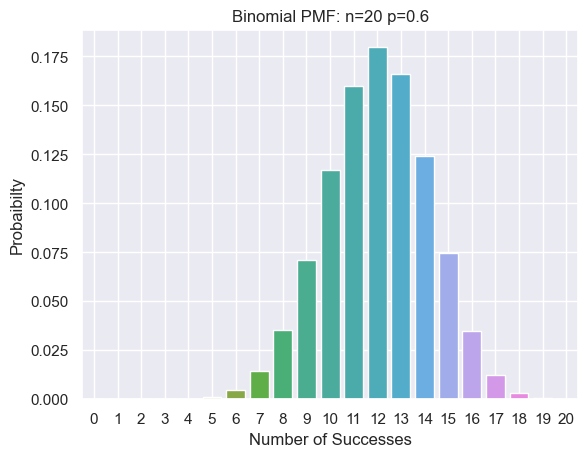

In [16]:
n=20
p=0.6
k=np.arange(n+1)

sns.barplot(x=k,y=stats.binom.pmf(n=n, p=p, k=k))
plt.xlabel('Number of Successes')
plt.ylabel('Probaibilty')
plt.grid(axis='both',which='both',c='w')
plt.title("Binomial PMF: n={} p={}".format(int(n),p))
plt.show()

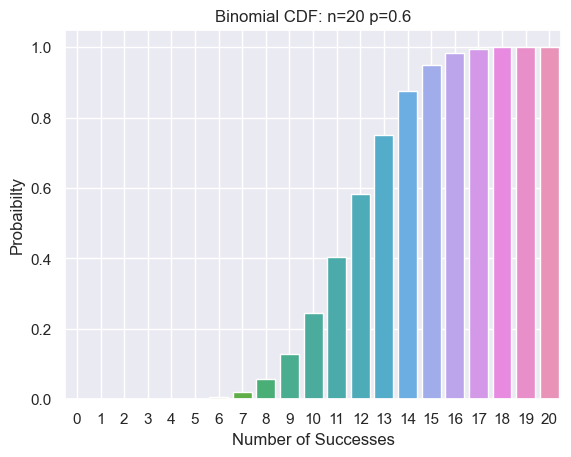

In [17]:
n=20
p=0.6
k=np.arange(n+1)

sns.barplot(x=k,y=stats.binom.cdf(n=n, p=p, k=k))
plt.xlabel('Number of Successes')
plt.ylabel('Probaibilty')
plt.grid(axis='both',which='both',c='w')
plt.title("Binomial CDF: n={} p={}".format(int(n),p))
plt.show()

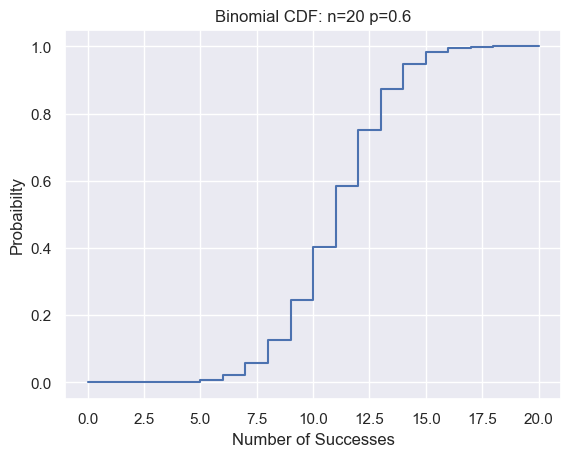

In [21]:
n=20
p=0.6
k=np.arange(n+1)

sns.lineplot(x=k,y=stats.binom.cdf(n=n, p=p, k=k),drawstyle='steps-pre')
plt.xlabel('Number of Successes')
plt.ylabel('Probaibilty')
plt.grid(axis='both',which='both',c='w')
plt.title("Binomial CDF: n={} p={}".format(int(n),p))
plt.show()

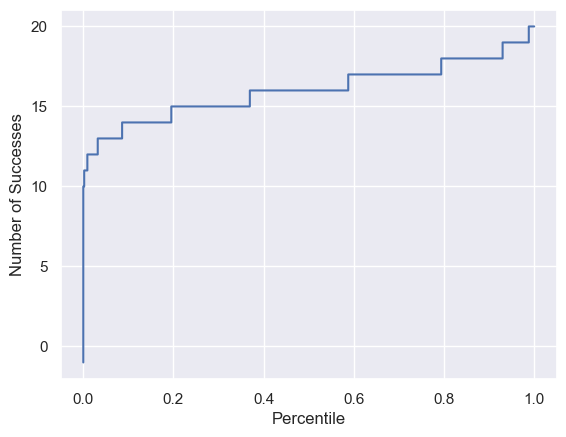

In [18]:
n=20
p=0.8
k_cdf=np.linspace(0,1,1000)

sns.lineplot(x=k_cdf,
             y=stats.binom.ppf(n=n, p=p, q=k_cdf),
             drawstyle='steps-pre')
plt.grid(axis='both',which='both')
plt.xlabel('Percentile')
plt.ylabel('Number of Successes')
plt.grid(axis='both',which='both',c='w')
plt.show()

## Uniform Distribution
The Stats library can only model the continous version.

Lets model the uniform process with:
* `a`: The lower bound for the domain of our R.V.
* `b`: The upper bound for the domain of our R.V.
>$P(X \leq x)=\frac{(x-a)}{(b-a)}$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html

### Individual instances of x:

In [19]:
a=1
b=9
k=3
stats.uniform.pdf(x=k, loc=a, scale=(b-a))

0.125

In [20]:
a=1
b=9
k=3
stats.uniform.cdf(x=k, loc=a, scale=(b-a))

0.25

In [21]:
a=1
b=9
k_cdf=0.25
stats.uniform.ppf(q=k_cdf, loc=a, scale=(b-a))

3.0

In [22]:
a=1
b=9
k_cdf=0.95
stats.uniform.interval(alpha=k_cdf, loc=a, scale=(b-a))

(1.2000000000000002, 8.8)

In [23]:
a=1
b=9
k=[1.2,8.8]
stats.uniform.cdf(x=k, loc=a, scale=(b-a))

array([0.025, 0.975])

### Multiple instances of x

In [24]:
a=1
b=9
k=[1,3,5,7,9]
stats.uniform.pdf(x=k, loc=a, scale=(b-a))

array([0.125, 0.125, 0.125, 0.125, 0.125])

In [25]:
a=1
b=9
k=[1,3,5,7,9]
stats.uniform.cdf(x=k, loc=a, scale=(b-a))

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [26]:
a=1
b=9
k_cdf=[0.0, 0.25, 0.5 , 0.75, 1.0]
stats.uniform.ppf(q=k_cdf, loc=a, scale=(b-a))

array([1., 3., 5., 7., 9.])

In [27]:
a=1
b=9
k_cdf=np.linspace(0,1,21)

uniform_percentiles=pd.DataFrame(data=stats.uniform.ppf(q=k_cdf, loc=a, scale=(b-a)),index=k_cdf,columns=['x'])
uniform_percentiles.index.name='Percentile'
uniform_percentiles

,x
Percentile,
0.00,1.0
0.05,1.4
0.10,1.8
0.15,2.2
0.20,2.6
0.25,3.0
0.30,3.4
0.35,3.8
0.40,4.2


### Uniform Plots

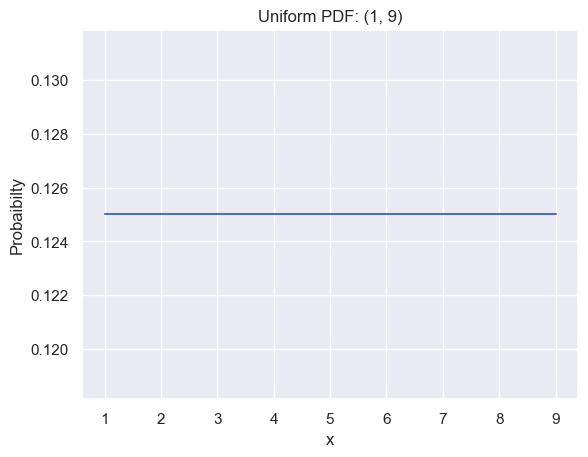

In [28]:
a=1
b=9
k=np.linspace(a,b,1000)

sns.lineplot(x=k,y=stats.uniform.pdf(x=k, loc=a, scale=(b-a)))
plt.xlabel('x')
plt.ylabel('Probaibilty')
plt.grid(axis='both',which='both',c='w')
plt.title("Uniform PDF: ({}, {})".format(a,b))
plt.show()

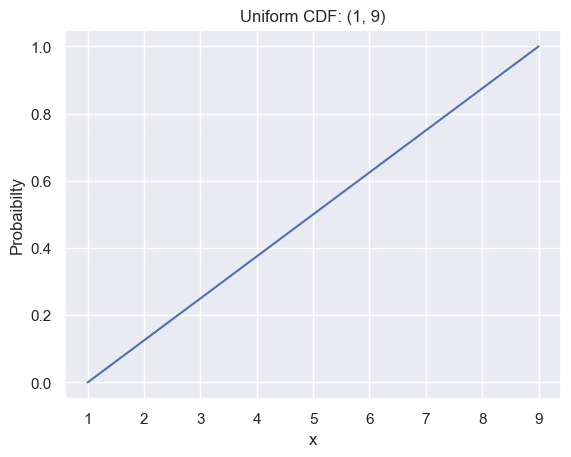

In [29]:
a=1
b=9
k=np.linspace(a,b,1000)

sns.lineplot(x=k,y=stats.uniform.cdf(x=k, loc=a, scale=(b-a)))
plt.xlabel('x')
plt.ylabel('Probaibilty')
plt.grid(axis='both',which='both',c='w')
plt.title("Uniform CDF: ({}, {})".format(a,b))
plt.show()

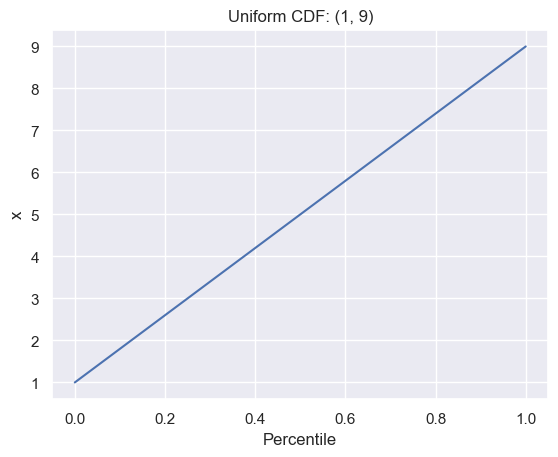

In [30]:
a=1
b=9
k_cdf=np.linspace(0,1,100)
stats.uniform.ppf(q=k_cdf, loc=a, scale=(b-a))

sns.lineplot(x=k_cdf, y=stats.uniform.ppf(q=k_cdf, loc=a, scale=(b-a)))
plt.xlabel('Percentile')
plt.ylabel('x')
plt.title("Uniform CDF: ({}, {})".format(a,b))
plt.grid(axis='both',which='both',c='w')
plt.show()


# Exponential Distribution

$f(x) = \frac{1}{\lambda} e ^ {- x / \lambda} \qquad \qquad x > 0$

or

$f(x) = \lambda e ^ {-\lambda x } \qquad \qquad x > 0$

$E[x]=\frac{1}{\lambda}$

$E[x^n]=\frac{n!}{{\lambda^n}}$

$Var[x]=\frac{1}{{\lambda^2}}$

$\lambda$

In [59]:
lam=10
stats.expon.moment(n=1, loc=0, scale=1/lam)

0.1

In [60]:
lam=10
round(stats.expon.moment(n=2, loc=0, scale=1/lam)-(stats.expon.moment(n=1, loc=0, scale=1/lam))**2,4)

0.01

## Single Instance

In [80]:
k=0.2
lam=5
stats.expon.pdf(x=k, loc=0, scale=1/lam)

1.8393972058572117

In [81]:
k=0.2
lam=5
stats.expon.cdf(x=k, loc=0, scale=1/lam)

0.6321205588285577

In [83]:
k_cdf=0.6321205588285577
lam=5
stats.expon.ppf(q=k_cdf, loc=0, scale=1/lam)

0.2

### Multiple instances of x

In [84]:
k=[0.2,0.5,2]
lam=5
stats.expon.pdf(x=k, loc=0, scale=1/lam)

array([1.83939721e+00, 4.10424993e-01, 2.26999649e-04])

In [85]:
k=[0.2,0.5,2]
lam=5
stats.expon.cdf(x=k, loc=0, scale=1/lam)

array([0.63212056, 0.917915  , 0.9999546 ])

In [88]:
k_cdf=[0.6321205588285577, 0.9179150013761012, 0.9999546000702375]
lam=5
stats.expon.ppf(q=k_cdf, loc=0, scale=1/lam)

array([0.2, 0.5, 2. ])

In [91]:
k_cdf=np.linspace(0,1,21)
lam=5

expon_percentiles=pd.DataFrame(data=stats.expon.ppf(q=k_cdf, loc=0, scale=1/lam),index=k_cdf,columns=['x'])
expon_percentiles.index.name='Percentile'
expon_percentiles

,x
Percentile,
0.00,0.000000
0.05,0.010259
0.10,0.021072
0.15,0.032504
0.20,0.044629
0.25,0.057536
0.30,0.071335
0.35,0.086157
0.40,0.102165


### Exponential Plots

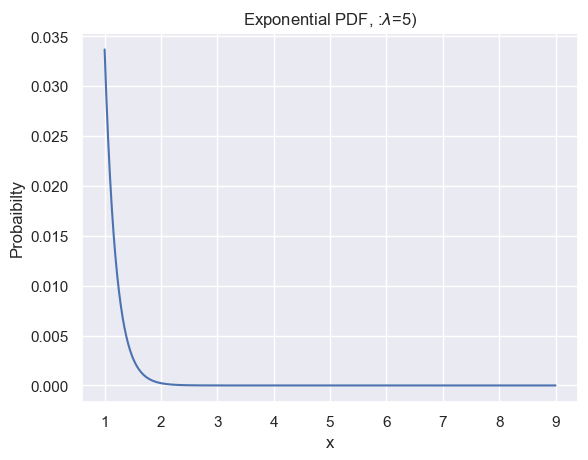

In [114]:
k=np.linspace(a,b,1000)
lam=5


sns.lineplot(x=k,y=stats.expon.pdf(x=k, loc=0, scale=1/lam))
plt.xlabel('x')
plt.ylabel('Probaibilty')
plt.grid(axis='both',which='both',c='w')
plt.title("Exponential PDF, :$\lambda$={})".format(lam))
plt.show()

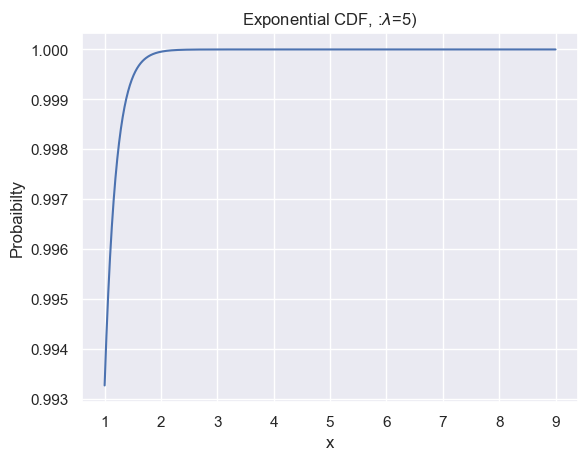

In [111]:
k=np.linspace(a,b,1000)
lam=5


sns.lineplot(x=k,y=stats.expon.cdf(x=k, loc=0, scale=1/lam))
plt.xlabel('x')
plt.ylabel('Probaibilty')
plt.grid(axis='both',which='both',c='w')
plt.title("Exponential CDF, :$\lambda$={})".format(lam))
plt.show()

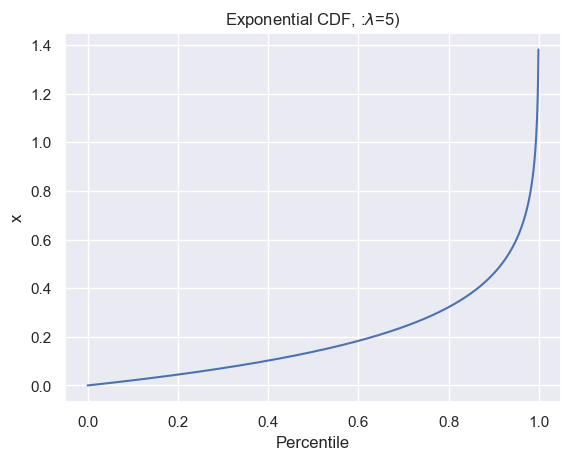

In [120]:
lam=5
k_cdf=np.linspace(0,1,1000)

sns.lineplot(x=k_cdf, y=stats.expon.ppf(q=k_cdf, loc=0, scale=1/lam))
plt.xlabel('Percentile')
plt.ylabel('x')
plt.title("Exponential CDF, :$\lambda$={})".format(lam))
plt.grid(axis='both',which='both',c='w')
plt.show()


## Normal Distribution
### Single Instance

In [31]:
mu=0
sigma=1
k=2
stats.norm.pdf(x=k,loc=mu,scale=sigma)

0.05399096651318806

In [32]:
mu=0
sigma=1
k=2
stats.norm.cdf(x=k,loc=mu,scale=sigma)

0.9772498680518208

In [33]:
mu=0
sigma=1
k_cdf=0.9772498680518208
stats.norm.ppf(q=k_cdf,loc=mu,scale=sigma)

2.0000000000000004

In [34]:
mu=0
sigma=1
k_cdf=0.95
stats.norm.interval(alpha=k_cdf,loc=mu,scale=sigma)

(-1.959963984540054, 1.959963984540054)

In [35]:
mu=0
sigma=1
k_cdf=[0.025,0.975]
stats.norm.ppf(q=k_cdf,loc=mu,scale=sigma)

array([-1.95996398,  1.95996398])

In [36]:
mu=160.9
sigma=6
n=50
k_cdf=0.95
stats.t.interval(alpha=k_cdf,df=n-1, loc=mu,scale=sigma/(n**0.5))

(159.19481886926576, 162.60518113073425)

### Multiple Instances

In [37]:
mu=0
sigma=1
k=[-3,2,1,0,1,2,3]

stats.norm.pdf(x=k,loc=mu,scale=sigma)

array([0.00443185, 0.05399097, 0.24197072, 0.39894228, 0.24197072,
       0.05399097, 0.00443185])

In [38]:
mu=0
sigma=1
k=[-3,2,1,0,1,2,3]

stats.norm.cdf(x=k,loc=mu,scale=sigma)

array([0.0013499 , 0.97724987, 0.84134475, 0.5       , 0.84134475,
       0.97724987, 0.9986501 ])

In [39]:
mu=0
sigma=1
k_cdf=[0.0013499, 0.97724987, 0.84134475, 0.5, 0.84134475, 0.97724987, 0.9986501]

stats.norm.ppf(q=k_cdf,loc=mu,scale=sigma).round(4)

array([-3.,  2.,  1.,  0.,  1.,  2.,  3.])

In [40]:
mu=0
sigma=1
k_cdf=np.linspace(0,1,21)

norm_percentiles=pd.DataFrame(data=stats.norm.ppf(q=k_cdf,loc=mu,scale=sigma),index=k_cdf,columns=['x'])
norm_percentiles.index.name='Percentile'
norm_percentiles

,x
Percentile,
0.00,-inf
0.05,-1.644854
0.10,-1.281552
0.15,-1.036433
0.20,-0.841621
0.25,-0.674490
0.30,-0.524401
0.35,-0.385320
0.40,-0.253347


### Normal Distribution Plots

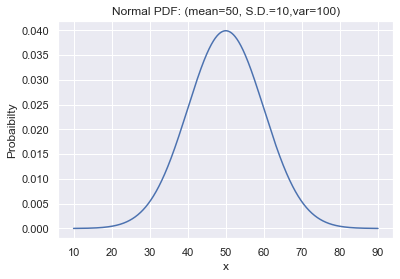

In [41]:
mu=50
sigma=10
k=np.linspace((mu-4*sigma),(mu+4*sigma),1000)

sns.lineplot(x=k,y=stats.norm.pdf(x=k,loc=mu,scale=sigma))
plt.xlabel('x')
plt.ylabel('Probaibilty')
plt.grid(axis='both',which='both',c='w')
plt.title("Normal PDF: (mean={}, S.D.={},var={})".format(mu,sigma,sigma**2))
plt.show()

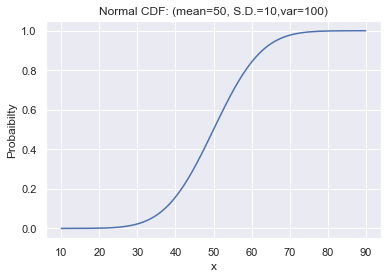

In [42]:
mu=50
sigma=10
k=np.linspace((mu-4*sigma),(mu+4*sigma),1000)

sns.lineplot(x=k,y=stats.norm.cdf(x=k,loc=mu,scale=sigma))
plt.xlabel('x')
plt.ylabel('Probaibilty')
plt.grid(axis='both',which='both',c='w')
plt.title("Normal CDF: (mean={}, S.D.={},var={})".format(mu,sigma,sigma**2))
plt.show()

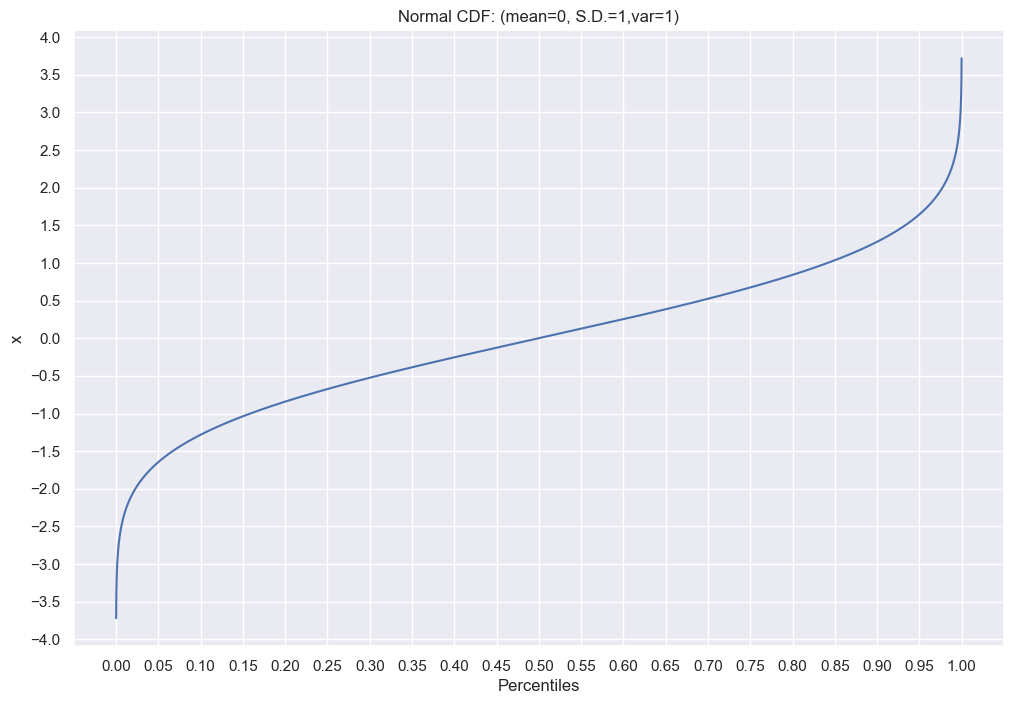

In [121]:
mu=0
sigma=1
k_cdf=np.linspace(0,1,10000)

plt.figure(figsize=(12,8))
sns.lineplot(x=k_cdf,y=stats.norm.ppf(q=k_cdf,loc=mu,scale=sigma))
plt.xlabel('Percentiles')
plt.ylabel('x')
plt.grid(axis='both',which='both',c='w')
plt.xticks(np.linspace(0, 1, 21))
plt.yticks(np.linspace(mu-4*sigma, mu+4*sigma, 17))
plt.title("Normal CDF: (mean={}, S.D.={},var={})".format(mu,sigma,sigma**2))
plt.show()

# t Distribution
## Single Instance

In [149]:
mu=8

sample_mu=10
sample_sigma=25
n=30
deg_free=n-1

test_stat=(sample_mu-mu)/(sample_sigma/(n**0.5))
print('\nSample Size: \t\t',n,
      '\nDegrees of Freedom: \t',deg_free,
      '\nsample_sigma:  \t\t',sample_sigma,
      '\nsample_mu:  \t\t',sample_mu,
      '\nmu:  \t\t\t',mu,
      '\nTest Statistic: \t',test_stat,
      '\nSample mu PDF: \t\t',stats.t.pdf(x=sample_mu, loc=mu, scale=sample_sigma/(n**0.5), df=deg_free),
      '\nTest Statistic PDF: \t',stats.t.pdf(x=test_stat, loc=0, scale=1, df=deg_free))


Sample Size: 		 30 
Degrees of Freedom: 	 29 
sample_sigma:  		 25 
sample_mu:  		 10 
mu:  			 8 
Test Statistic: 	 0.4381780460041329 
Sample mu PDF: 		 0.07848735985452132 
Test Statistic PDF: 	 0.358244145594556


In [150]:
mu=8

sample_mu=10
sample_sigma=25
n=30
deg_free=n-1

test_stat=(sample_mu-mu)/(sample_sigma/(n**0.5))
print('\nSample Size: \t\t',n,
      '\nDegrees of Freedom: \t',deg_free,
      '\nsample_sigma:  \t\t',sample_sigma,
      '\nsample_mu:  \t\t',sample_mu,
      '\nmu:  \t\t\t',mu,
      '\nTest Statistic: \t',test_stat,
     '\nSample mu CDF: \t\t',stats.t.cdf(x=sample_mu, loc=mu, scale=sample_sigma/(n**0.5), df=deg_free),
     '\nTest Statistic CDF: \t',stats.t.cdf(x=test_stat, loc=0, scale=1, df=deg_free))


Sample Size: 		 30 
Degrees of Freedom: 	 29 
sample_sigma:  		 25 
sample_mu:  		 10 
mu:  			 8 
Test Statistic: 	 0.4381780460041329 
Sample mu CDF: 		 0.6677480258013038 
Test Statistic CDF: 	 0.6677480258013038


In [151]:
test_stat_cdf=0.6677480258013038

sample_sigma=25
n=30
deg_free=n-1

test_stat=stats.t.ppf(q=test_stat_cdf,loc=0,scale=1,df=deg_free)
sample_mu=stats.t.ppf(q=test_stat_cdf,loc=mu,scale=sample_sigma/(n**0.5),df=deg_free)
print('\nSample Size: \t\t',n,
      '\nDegrees of Freedom: \t',deg_free,
      '\nsample_sigma:  \t\t',sample_sigma,
      '\nsample_mu:  \t\t',sample_mu,
      '\nmu:  \t\t\t',mu,
      '\nTest Statistic: \t',test_stat,
      '\nTest Statistic CDF: \t',test_stat_cdf)



Sample Size: 		 30 
Degrees of Freedom: 	 29 
sample_sigma:  		 25 
sample_mu:  		 9.999999995302582 
mu:  			 8 
Test Statistic: 	 0.4381780449749803 
Test Statistic CDF: 	 0.6677480258013038


## Multiple Instances

In [84]:
mu=0

sample_mu=np.array([-4,-2,0,2,4])
sample_sigma=15
n=200
deg_free=n-1

test_stat=(sample_mu-mu)/(sample_sigma/(n**0.5))

stats.t.pdf(x=test_stat, loc=0, scale=1, df=deg_free)

array([0.00040034, 0.06780414, 0.39844141, 0.06780414, 0.00040034])

In [89]:
mu=0

sample_mu=np.array([-4,-2,0,2,4])
sample_sigma=25
n=30
deg_free=n-1

test_stat=(sample_mu-mu)/(sample_sigma/(n**0.5))
test_stat_cdf=stats.t.cdf(x=test_stat, loc=0, scale=1, df=deg_free)

print('Sample Size: \t\t',n,
      '\nDegrees of Freedom: \t',deg_free,
      '\nsample_sigma: \t\t',sample_sigma,
     ' \nsample_mu: \t\t',sample_mu,
      '\nTest Statistic: \t',list(test_stat),
      '\nTest Statistic CDF: \t',list(test_stat_cdf) )

Sample Size: 		 30 
Degrees of Freedom: 	 29 
sample_sigma: 		 25  
sample_mu: 		 [-4 -2  0  2  4] 
Test Statistic: 	 [-0.8763560920082658, -0.4381780460041329, 0.0, 0.4381780460041329, 0.8763560920082658] 
Test Statistic CDF: 	 [0.19401911247085019, 0.3322519741986963, 0.5, 0.6677480258013038, 0.8059808875291499]


In [120]:
test_stat_cdf=np.array([0.19401911247085019, 0.3322519741986963, 0.5, 0.6677480258013038, 0.8059808875291499])

mu=0

sample_sigma=25
n=30
deg_free=n-1

test_stat=stats.t.ppf(q=test_stat_cdf,loc=0,scale=1,df=deg_free)
sample_mu=(test_stat*(sample_sigma/(n**0.5))+mu)
print('Sample Size: \t\t',n,
      '\nDegrees of Freedom: \t',deg_free,
      '\nsample_sigma: \t\t',sample_sigma,
      '\nsample_mu: \t\t',list(np.round(sample_mu,6)),
      '\nsample_mu: \t\t',list(np.round(stats.t.ppf(q=test_stat_cdf,loc=mu,scale=sample_sigma/(n**0.5),df=deg_free),6)),
      '\nTest Statistic: \t',list(np.round(test_stat,15)),
      '\nTest Statistic CDF: \t',list(test_stat_cdf) )

Sample Size: 		 30 
Degrees of Freedom: 	 29 
sample_sigma: 		 25 
sample_mu: 		 [-4.0, -2.0, 0.0, 2.0, 4.0] 
sample_mu: 		 [-4.0, -2.0, 0.0, 2.0, 4.0] 
Test Statistic: 	 [-0.876356090027764, -0.43817804497498, 0.0, 0.43817804497498, 0.876356090027764] 
Test Statistic CDF: 	 [0.19401911247085019, 0.3322519741986963, 0.5, 0.6677480258013038, 0.8059808875291499]


In [104]:
test_stat_cdf=np.linspace(0,1,21)

mu=0

sample_sigma=25
n=30
deg_free=n-1

test_stat=stats.t.ppf(q=test_stat_cdf,loc=0,scale=1,df=deg_free)
sample_mu=(test_stat*(sample_sigma/(n**0.5))+mu)


t_dist_percentiles=pd.DataFrame(data=stats.t.ppf(q=test_stat_cdf,loc=0,scale=1,df=deg_free),
                                                    index=test_stat_cdf,columns=['t-stat'])

t_dist_percentiles.index.name='Percentile'
t_dist_percentiles['Sample mu']=sample_mu
t_dist_percentiles=np.round(t_dist_percentiles,10)
t_dist_percentiles

,t-stat,Sample mu
Percentile,,
0.00,-inf,-inf
0.05,-1.699127,-7.755418
0.10,-1.311434,-5.985848
0.15,-1.055302,-4.816774
0.20,-0.854192,-3.898835
0.25,-0.683044,-3.117654
0.30,-0.530214,-2.420087
0.35,-0.389161,-1.776269
0.40,-0.255684,-1.167031


### t-distribution Plots

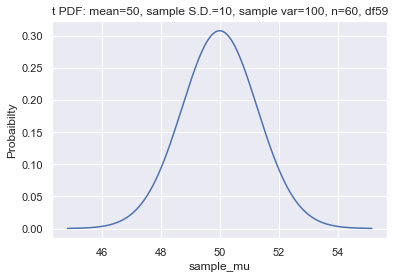

In [195]:
mu=50
sample_sigma=10
n=60
deg_free=n-1

sample_mu=np.linspace((mu-4*sample_sigma/(n**0.5)),(mu+4*sample_sigma/(n**0.5)),1000)

sns.lineplot(x=sample_mu,y=stats.t.pdf(x=sample_mu,loc=mu,scale=sample_sigma/(n**0.5), df=deg_free))
plt.xlabel('sample_mu')
plt.ylabel('Probaibilty')
plt.grid(axis='both',which='both',c='w')
plt.title("t PDF: mean={}, sample S.D.={}, sample var={}, n={}, df{}".format(mu,sample_sigma,sample_sigma**2,n,deg_free))
plt.show()

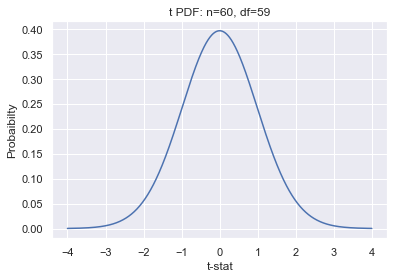

In [196]:
n=60
deg_free=n-1

test_stat=np.linspace(-4,4,1000)

sns.lineplot(x=test_stat,y=stats.t.pdf(x=test_stat,loc=0,scale=1, df=deg_free))
plt.xlabel('t-stat')
plt.ylabel('Probaibilty')
plt.grid(axis='both',which='both',c='w')
plt.title("t PDF: n={}, df={}".format(n,deg_free))
plt.show()

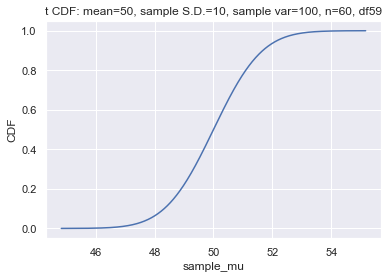

In [205]:
mu=50
sample_sigma=10
n=60
deg_free=n-1

sample_mu=np.linspace((mu-4*sample_sigma/(n**0.5)),(mu+4*sample_sigma/(n**0.5)),1000)

sns.lineplot(x=sample_mu,y=stats.t.cdf(x=sample_mu,loc=mu,scale=sample_sigma/(n**0.5), df=deg_free))
plt.xlabel('sample_mu')
plt.ylabel('CDF')
plt.grid(axis='both',which='both',c='w')
plt.title("t CDF: mean={}, sample S.D.={}, sample var={}, n={}, df{}".format(mu,sample_sigma,sample_sigma**2,n,deg_free))
plt.show()

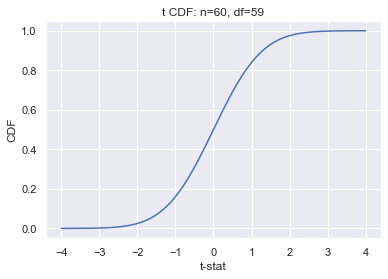

In [206]:
n=60
deg_free=n-1

test_stat=np.linspace(-4,4,1000)

sns.lineplot(x=test_stat,y=stats.t.cdf(x=test_stat,loc=0,scale=1, df=deg_free))
plt.xlabel('t-stat')
plt.ylabel('CDF')
plt.grid(axis='both',which='both',c='w')
plt.title("t CDF: n={}, df={}".format(n,deg_free))
plt.show()

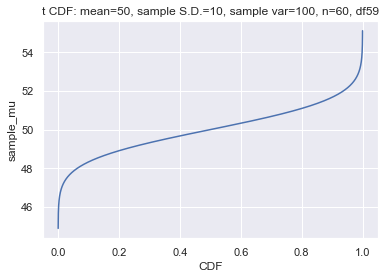

In [204]:
mu=50
sample_sigma=10
n=60
deg_free=n-1

sample_mu_cdf=np.linspace(0,1,10001)


sns.lineplot(x=sample_mu_cdfy=stats.t.ppf(q=sample_mu_cdf,loc=mu,scale=sample_sigma/(n**0.5),df=deg_free))
plt.xlabel('CDF')
plt.ylabel('sample_mu')
plt.grid(axis='both',which='both',c='w')
plt.title("t CDF: mean={}, sample S.D.={}, sample var={}, n={}, df{}".format(mu,sample_sigma,sample_sigma**2,n,deg_free))
plt.show()

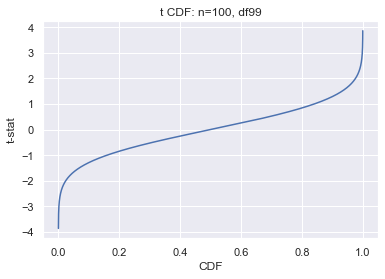

In [211]:
n=100
deg_free=n-1

test_stat_cdf=np.linspace(0,1,10001)


sns.lineplot(x=test_stat_cdf,y=stats.t.ppf(q=test_stat_cdf,loc=0,scale=1,df=deg_free))
plt.xlabel('CDF')
plt.ylabel('t-stat')
plt.grid(axis='both',which='both',c='w')
plt.title("t CDF: n={}, df{}".format(n,deg_free))
plt.show()

## Sampling Distribution

The sampling distribution of a statistic is the probability distribution of that
statistic when we draw many samples

Central Limit Theorem states if the first three hold, then the last four will hold as `n` the sample size tends to infinity:
1) $E[x]=\mu$

2) $S.D.[x]=\sigma$

3) $Var[x]=\sigma^2$

4) $E[\bar{x}]=\mu$

5) $S.D.[\bar{x}]=\frac{\sigma}{\sqrt{n}}$

6) $Var[\bar{x}]=\frac{\sigma^{2}}{n}$

7)$\bar{x}\sim \mathcal{N}(\mu,\,\frac{\sigma^{2}}{n})$

Other key assumptions include:
* Data must be randomly sampled 
* Sample values must be independent of each other
* Samples should come from the same distribution 
* Sample size must be sufficiently large (≥30)

## Estimation
The problem of estimation is considered, when there is no previous knowledge of the population parameter. Estimation makes an inference about a population parameter based on the sample statistic. It involves:
* Taking a random sample;
* Computing the appropriate sample statistic;
* Based on characteristics of the sample and the test statisitc, suggest point and interval estimates.

Estimation comes in two flavours:
* <b>Point Estimation</b>: Single point estimation of the population parameter. E.g. Population mean as estimated from the sample mean is \$40
* <b>Interval Estimation</b>: A range of values within which the population parameter lies with some $(1-\alpha)$ confidence. E.g. Population mean should lie between \$38-42, with 95\% confidence

https://bcheggeseth.github.io/Stat155Notes/sampling-distribution-and-clt.html

## Point Estimate

Usually, the point estimate of an unknown population parameter is the corresponding sample statistic. For example:

    The sample mean X̅ is a point estimate of the population mean μ;
    The sample standard deviation is a point estimate of the population standard deviation σ;
    The sample proportion of success p is a point estimate of the population  proportion of success π.

## Interval Estimation
Point estimates vary from sample to sample. Often an interval is used to provide a range of values the parameter can take, instead of a single point estimate.

**It is rarely the case when you know the population standard deviation and not the mean. However, it may not be as unlikely an assumption as it seems. For a tight manufacturing process that is in place for a long time, the variability in the process may be controlled, but with small changes in temperature or humidity, the mean may change.**

# Hypothesis Testing
A hypothesis is a conjecture about the population parameter(s).

Hypothesis testing is used to:
* Testing research hypotheses;
* Testing the validity of a claim;
* Testing the effect of decisions.

## Hypothesis Testing Process
* Identify the key question: What is the research question that you are trying to answer

* Formulate the null and alternate hypothesis:
    * <b>Null hypothesis ($H_0$)</b>: This is the status quo aka current condition. Always contains equality. It is assumed to be true unless reasonably strong evidence to the contrary is found; and 
    * <b>Alternate hypothesis ($H_a$)</b>: The research hypothesis, what we suspect or what we want to test for. Doesn’t contain equality


* <b>Set the Level of Significance ($\alpha$)</b>: $\alpha$ is the probability of rejecting the null hypothesis when it is true and  it is fixed before the hypothesis test. This creates two regions:
    * <b>Acceptance region</b>: This is bounded by our (1-$\alpha$) confidence interval, meaning (1-$\alpha$) of the time, our population parameter can fall in this region and at a significance level of $\alpha$, they are deemed to be either compliant with the null hypothesis or not too contrarian to the null hypothesis ($H_0$), basically a resonable interval for the population parameter to fall in and as a result we fail to reject the null hypothesis ($H_0$)
    * <b>Rejection/Critical region</b>: $\alpha$ of the time, our population parameter can fall in this region but they are deemed too extreme in contradiction of our null hypothesis ($H_0$) at a significance level of $\alpha$ and thus we reject the null hypothesis ($H_0$) in favour of the alternate hypothesis ($H_a$)

* Collect, understand  and prepare data: What data do you have? Do you understand what it means? Can it be used directly?

* Identify the right test: Ensure that data satisfies the assumption for the test. For example the z-test for population mean, requires 
    * Continuous data
    * Normally distributed population or sample size > 30
    * Known population standard deviation 𝜎
    * Random sampling from the population;

* Compute test Statistic;

* Determine if there is enough evidence to either: Reject the null hypothesis ($H_0$), in favour of the alternate hypothesis ($H_a$); or fail to reject the null hypothesis ($H_0$). This can be ahieved in two ways, using either:
    * <b>Compare the P-Value to the level of significance ($\alpha$)</b>: P-value is computed as the (1-CDF) of the test statistic. It is the Probability of observing equal or more extreme results than the computed test statistic under the null hypothesis. The smaller the p-value, the stronger the evidence against the null hypothesis. When:
        * P-value$<\alpha$: Reject the null:
            * With a $(1-\alpha)$ confidence interval; or similarly stated
            * At a $\alpha$ significance level
        * P-value$\ge\alpha$: Fail to reject the null:
            * With a $(1-\alpha)$ confidence interval; or similarly stated
            * At a $\alpha$ significance level
    * <b>Compare the test staistic to the critical value(s):  ($\alpha$)</b>: Critical values are possible values of our population parameter that mark the borders of our acceptance regions. Technically, one-sided tests have one critical value and two-sided test have two critical values. When:
        * $t \in (c_{lower},c_{upper})$: Fail to reject the null in favour of the alternate with:
            * A $(1-\alpha)$ confidence interval; or similarly stated
            * At a $\alpha$ significance level
        * $t \not\in (c_{lower},c_{upper})$: Reject the null in favour of the alternate with:
            * A $(1-\alpha)$ confidence interval; or similarly stated
            * At a $\alpha$ significance level
* Draw conclusion.
    
    
A critical value is a point on the distribution of the test statistic under the null hypothesis that defines a set of values that call for rejecting the null hypothesis. This set is called critical or rejection region. Usually, 
hypothesis.

Since hypothesis testing is done on the basis of sampling distribution, the decisions made are probabilistic not deterministic.

## Hypothesis Testing Errors
There are two types of errors:
* Type 1 error - When we reject the null hypothesis when it is actually true.
* Type 2 error - When we fail to reject the null hypothesis when it is actually false

                            Null is True                   Null is False
    Reject Reject Null      Type I Error (𝛼)               Correct Decision(1-𝛽)  
    Fail to reject Null     Correct Decision(1-𝛼)          Type II Error (𝛽)

Our test has:
* Level of significance= $\alpha$
* Confidence Level =$(1-\alpha)$
* Power of the test = $(1 - \beta)$
